**Equalisation d'histogramme**

In [278]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp_stat
import scipy.interpolate as sp_interp
import math as m

*Génération des données selon une loi de Poisson $\Rightarrow p(k)=\mathbb{P}(X=k)=exp(-\lambda)\frac{\lambda^k}{k!}$*

In [279]:
mu_ni=5
ni=sp_stat.poisson.rvs(mu=mu_ni,size=1000000)

In [280]:
p_ni,bin_ni=np.histogram(ni,bins=20,density=False)
left,right = bin_ni[:-1],bin_ni[1:]
x_pni = np.array([left,right]).T.flatten()
y_pni = np.array([p_ni,p_ni]).T.flatten()
sd_ni = np.std(ni)
qt_ni=np.quantile(ni,0.95)

*Histogramme des probabilités*

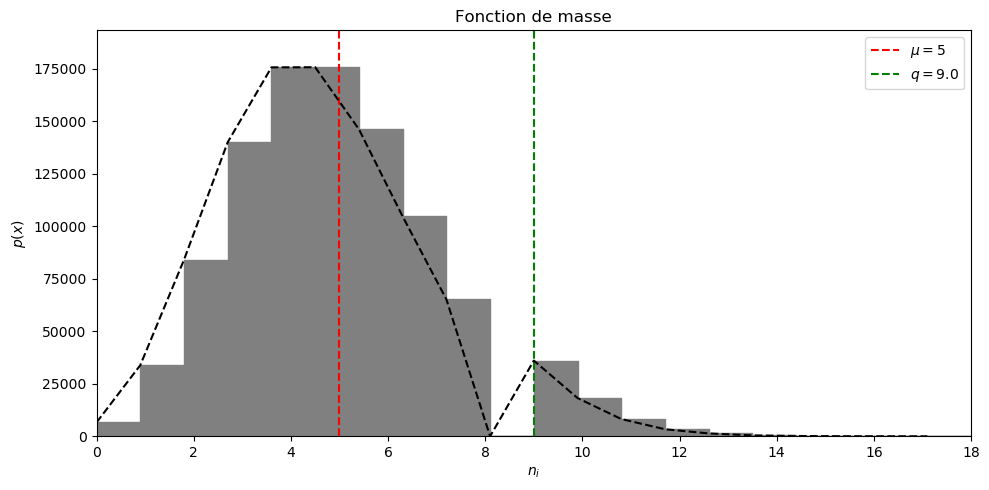

In [281]:
fig,ax=plt.subplots(figsize=(10,5))
ax.vlines(mu_ni,0,y_pni.max()+0.1*y_pni.max(),linestyles="dashed",colors="red",label=r"$\mu = $"+str(mu_ni))
#ax.vlines(mu_ni+sd_ni,0,y_pni.max()+0.1*y_pni.max(),linestyles="dashed",colors="tomato",label=r"$\mu\pm\sigma$ avec $\sigma = $"+str(round(sd_ni,2)))
#ax.vlines(mu_ni-sd_ni,0,y_pni.max()+0.1*y_pni.max(),linestyles="dashed",colors="tomato")
ax.vlines(qt_ni,0,y_pni.max()+0.1*y_pni.max(),linestyles="dashed",colors="green",label=r"$q = $"+str(qt_ni))
ax.fill_between(x_pni,y_pni,color="grey")
ax.plot(bin_ni[:-1],p_ni,color="black",linestyle="dashed")
ax.set_title("Fonction de masse")
ax.set_xlim(x_pni.min(),x_pni.max())
ax.set_ylim(0,y_pni.max()+0.1*y_pni.max())
ax.set_xlabel(r"$n_i$")
ax.set_ylabel(r"$p(x)$")
ax.legend()
plt.tight_layout()
plt.show()

*Courbe cumulative des probabilités $F(x)=P(X\leq x)=\int_0^x f(x)dx$*

In [282]:
P_ni=np.cumsum(p_ni)
X_Pni=np.linspace(x_pni.min(),x_pni.max(),len(P_ni))

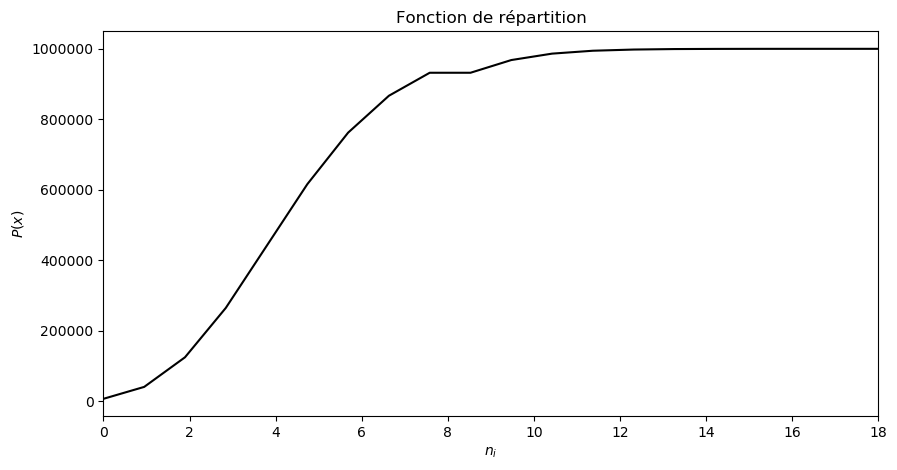

In [283]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(X_Pni,P_ni,color="black")
ax.set_xlim(X_Pni.min(),X_Pni.max())
ax.set_xlabel(r"$n_i$")
ax.set_ylabel(r"$P(x)$")
ax.set_title("Fonction de répartition")
plt.show()

*Interpolation*

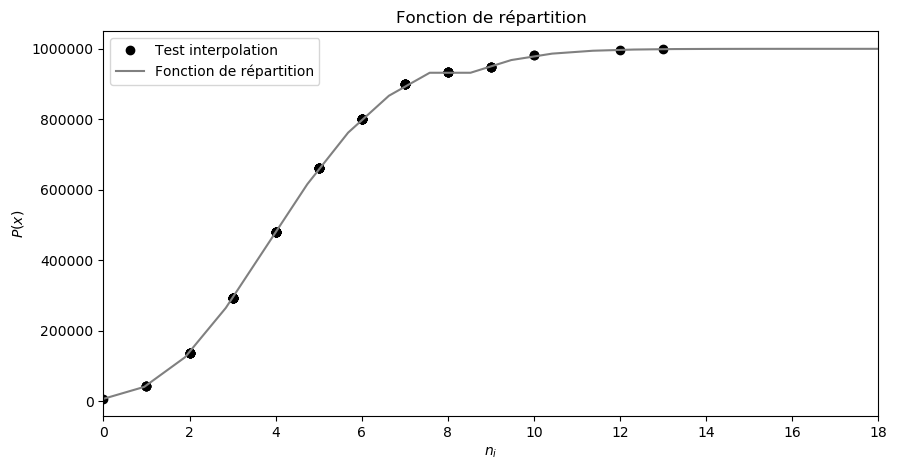

In [284]:
#interp_ni=np.interp(ni,X_Pni,P_ni) avec numpy... je sais pas si c'est l'interp qui marche pas de la même façon mais ca ne marche pas
interp_ni=sp_interp.interp1d(X_Pni,P_ni,kind="cubic")
ni_test=sp_stat.poisson.rvs(mu=mu_ni,size=100) #np.linspace(0,20,21)
y_test=interp_ni(ni_test)
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(ni_test,y_test,"o",color="black",label="Test interpolation")
ax.plot(X_Pni,P_ni,color="grey",label="Fonction de répartition")
ax.set_xlim(X_Pni.min(),X_Pni.max())
ax.set_xlabel(r"$n_i$")
ax.set_ylabel(r"$P(x)$")
ax.set_title("Fonction de répartition")
ax.legend()
plt.show()

*Représentation de la repartition des données interpolées*

In [285]:
p_interp_ni,bin_interp_ni=np.histogram(y_test,bins=10,density=False)
left,right = bin_interp_ni[:-1],bin_interp_ni[1:]
x_p_interp_ni = np.array([left,right]).T.flatten()
y_p_interp_ni = np.array([p_interp_ni,p_interp_ni]).T.flatten()

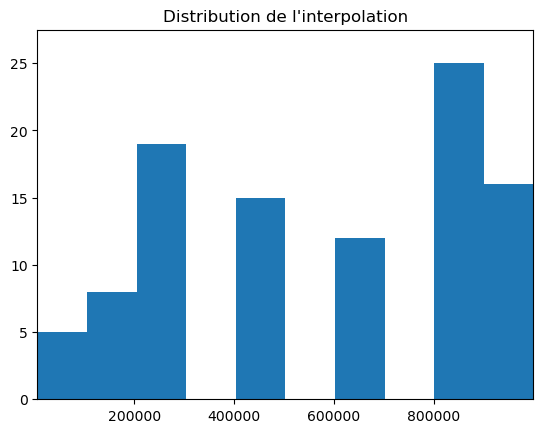

In [286]:
fig,ax=plt.subplots()
ax.fill_between(x_p_interp_ni,y_p_interp_ni)
ax.set_xlim(x_p_interp_ni.min(),x_p_interp_ni.max())
ax.set_ylim(0,y_p_interp_ni.max()+y_p_interp_ni.max()*0.1)
ax.set_title("Distribution de l'interpolation")
plt.show()